<a href="https://colab.research.google.com/github/sukhadadh/Machine-Learning-Projects/blob/main/mall_customer_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans

In [ ]:
mall = pd.read_csv("Mall_Customers.csv")

In [ ]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
mall.shape

(200, 5)

In [ ]:
mall.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
mall['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

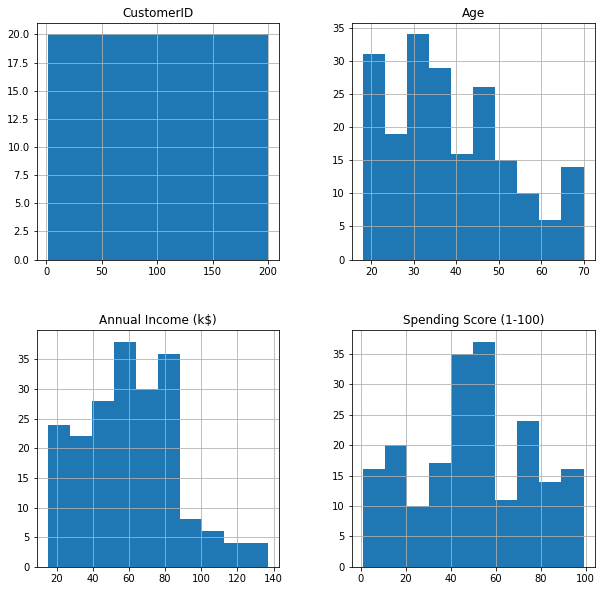

In [ ]:
mall.hist(figsize =(10,10))
plt.show()

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(mall[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']])

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [ ]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
def label_transform(x):
    le = LabelEncoder()
    Encoded_le = le.fit_transform(x)
    return Encoded_le


In [ ]:
catagoral_label=["Gender"]


In [ ]:
for x in catagoral_label:
    mall[x] = label_transform(mall[x])



In [ ]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


1 - male

2 - female

In [ ]:
def doKmeans(x, nclust=3):
    model = KMeans(nclust)
    model.fit(x)
    clust_labels = model.predict(x)
    cent = model.cluster_centers_
    return (clust_labels, cent)

In [ ]:
clust_labels, cent = doKmeans(mall, 2)
kmeans = pd.DataFrame(clust_labels)
mall.insert((mall.shape[1]),'kmeans',kmeans)

In [ ]:
mall.head(n=10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1
5,6,0,22,17,76,1
6,7,0,35,18,6,1
7,8,0,23,18,94,1
8,9,1,64,19,3,1
9,10,0,30,19,72,1


In [ ]:
def condition(x):
    if x == 0:
        x = "cluster0"
    elif x == 1:
        x = "cluster1"
    else:
        x = "cluster2"
    
    return x
mall["cluster_name"] = mall["kmeans"].apply(lambda x: condition(x))

In [ ]:
mall[mall['cluster_name'] == 'cluster0']

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans,cluster_name
99,100,1,20,61,49,0,cluster0
100,101,0,23,62,41,0,cluster0
101,102,0,49,62,48,0,cluster0
102,103,1,67,62,59,0,cluster0
103,104,1,26,62,55,0,cluster0
...,...,...,...,...,...,...,...
195,196,0,35,120,79,0,cluster0
196,197,0,45,126,28,0,cluster0
197,198,1,32,126,74,0,cluster0
198,199,1,32,137,18,0,cluster0


In [ ]:
mall[mall['cluster_name'] == 'cluster1']

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans,cluster_name
0,1,1,19,15,39,1,cluster1
1,2,1,21,15,81,1,cluster1
2,3,0,20,16,6,1,cluster1
3,4,0,23,16,77,1,cluster1
4,5,0,31,17,40,1,cluster1
...,...,...,...,...,...,...,...
94,95,0,32,60,42,1,cluster1
95,96,1,24,60,52,1,cluster1
96,97,0,47,60,47,1,cluster1
97,98,0,27,60,50,1,cluster1


In [ ]:
mall[mall['cluster_name'] == 'cluster2']

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans,cluster_name


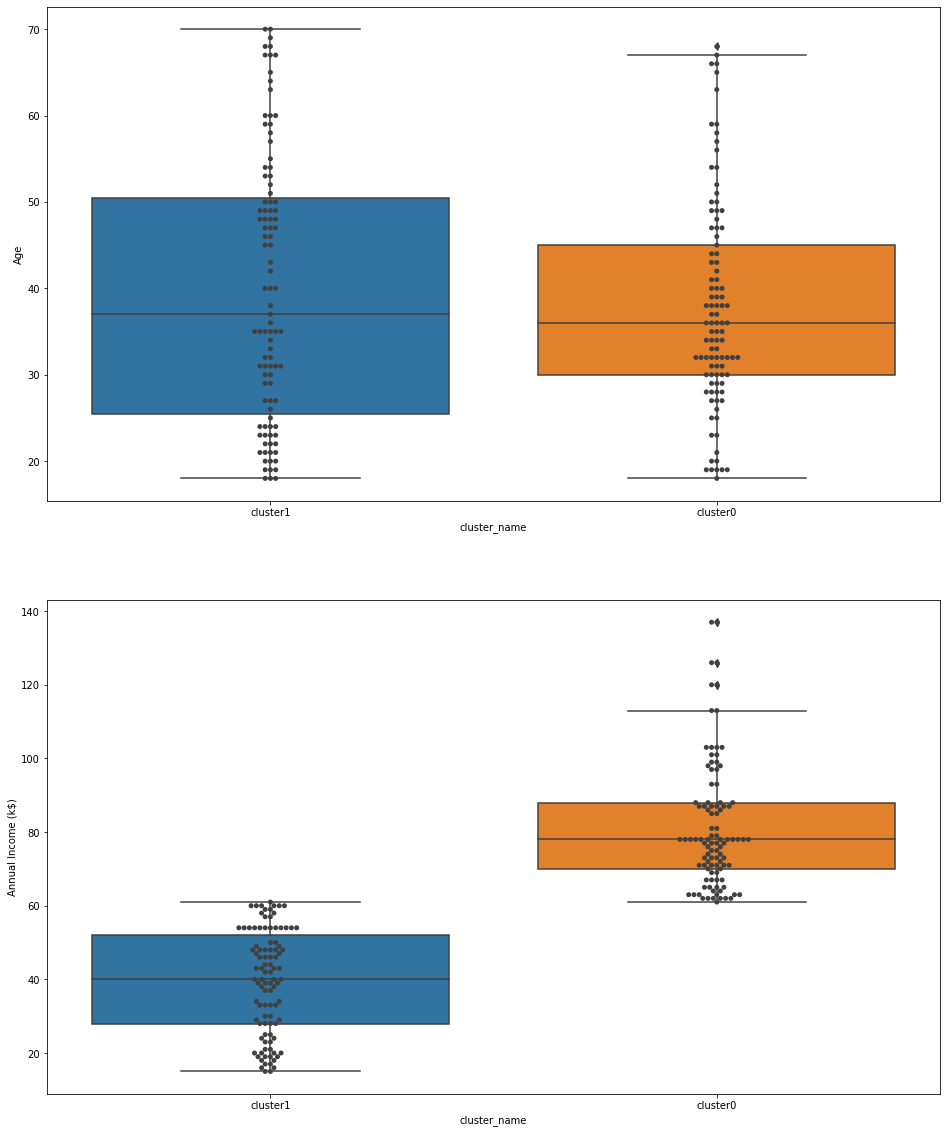

In [ ]:
fig, (ax2,ax3) = plt.subplots(nrows = 2)
fig.set_figwidth(16)
fig.set_figheight(20)

# Cluster analysis of customers
x = sns.boxplot(x="cluster_name", y='Age', data=mall, ax= ax2)
x = sns.swarmplot(x="cluster_name", y='Age', data=mall,color=".25",ax= ax2)
# Cluster analysis of clusters
x = sns.boxplot(x="cluster_name", y='Annual Income (k$)', data=mall, ax= ax3)
x = sns.swarmplot(x="cluster_name", y='Annual Income (k$)', data=mall,color=".25",ax= ax3)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score for kmeans algorithm is",accuracy_score(clust_labels,kmeans ))

Accuracy score for kmeans algorithm is 1.0


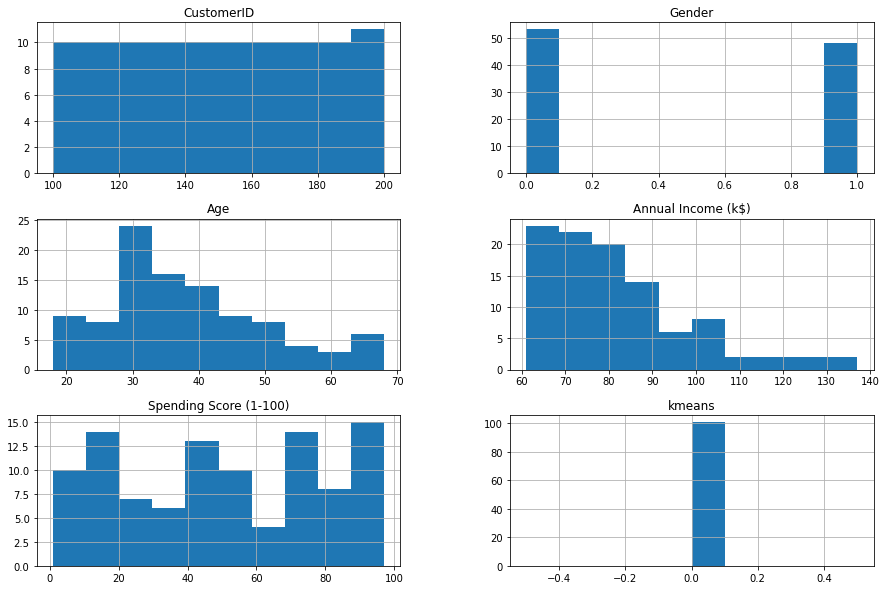

In [ ]:
mall[mall['cluster_name'] == 'cluster0'].hist(figsize = (15,10))
plt.show()

cluster0
1. customers with eqaul no of male and female
2. age group 28 to 33 years
3. income between 61 to 68 (k$)
4. spending score is approx between 86 to 96

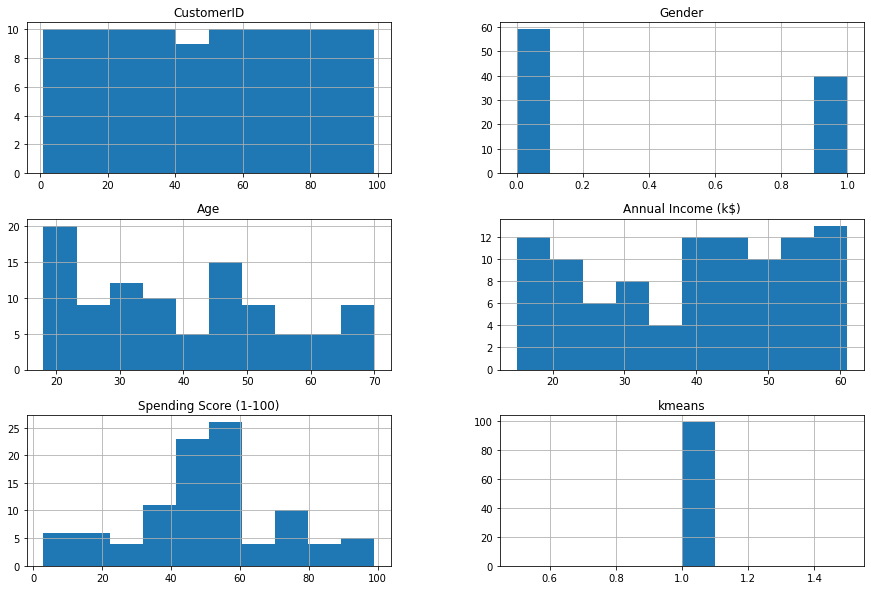

In [ ]:
mall[mall['cluster_name'] == 'cluster1'].hist(figsize = (15,10))
plt.show()

cluster1
1. more no of male customers
2. Age group 15 to 22 years (mostely teenagers)
3. income of 55 to 61 (k$) approx
4. spending score approx between 50 to 60

conclusion
1. spending score and annual income of customers in cluster0 is more than cluster1
2. mostely teenagers customers are there in cluster1
3. overall mall should take care of demands of mostly younge customers
